In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

human_fall = pd.read_csv('All Users Combined.csv')
human_fall

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos,activity
0,-9.494311,5.423363,0.196757,-1.684995,0.401508,1.334339,-8.855526,4.199663,-0.335983,-0.762366,-0.750471,1.109060,0.232662,0.672025,0.101603,0.695649,Running
1,-8.890651,2.520043,0.963310,-0.895032,-1.936677,1.436671,-8.399648,5.060810,0.067106,-0.613229,-0.121966,1.906942,0.245168,0.660660,0.131849,0.697164,Running
2,-5.632800,1.581015,0.230293,2.350318,-3.642859,-1.169414,-7.911231,5.790931,0.218930,-0.142383,-0.352063,1.759936,0.264845,0.648175,0.163016,0.695091,Running
3,-6.322698,6.228244,-0.756644,0.812825,-0.722664,-0.334024,-7.523226,6.280006,0.364660,-0.148775,-0.382955,1.208129,0.299550,0.624335,0.195080,0.694564,Running
4,-7.640211,4.862821,1.715490,0.349670,-0.468074,-0.378780,-6.921238,6.909286,0.727059,-1.047857,0.379773,0.828895,0.310003,0.607825,0.220415,0.697039,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94193,0.648145,14.641164,8.029972,3.124783,8.580249,1.343975,0.424226,8.583048,4.724585,-0.939200,0.797357,0.843809,0.270950,0.427377,0.745399,0.433953,Walking
94194,0.648145,14.641164,8.029972,3.124783,8.580249,1.343975,0.424226,8.583048,4.724585,-0.939200,0.797357,0.843809,0.270950,0.427377,0.745399,0.433953,Walking
94195,0.648145,14.641164,8.029972,3.124783,8.580249,1.343975,0.424226,8.583048,4.724585,-0.939200,0.797357,0.843809,0.270950,0.427377,0.745399,0.433953,Walking
94196,0.648145,14.641164,8.029972,3.124783,8.580249,1.343975,0.424226,8.583048,4.724585,-0.939200,0.797357,0.843809,0.270950,0.427377,0.745399,0.433953,Walking


In [ ]:
print(human_fall.info())
print("\n",human_fall['activity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94198 entries, 0 to 94197
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AG-X       94198 non-null  float64
 1   AG-Y       94198 non-null  float64
 2   AG-Z       94198 non-null  float64
 3   Acc-X      94198 non-null  float64
 4   Acc-Y      94198 non-null  float64
 5   Acc-Z      94198 non-null  float64
 6   Gravity-X  94198 non-null  float64
 7   Gravity-Y  94198 non-null  float64
 8   Gravity-Z  94198 non-null  float64
 9   RR-X       94198 non-null  float64
 10  RR-Y       94198 non-null  float64
 11  RR-Z       94198 non-null  float64
 12  RV-X       94198 non-null  float64
 13  RV-Y       94198 non-null  float64
 14  RV-Z       94198 non-null  float64
 15  cos        94198 non-null  float64
 16  activity   94198 non-null  object 
dtypes: float64(16), object(1)
memory usage: 12.2+ MB
None

 activity
Walking        25371
Sitting        19784
Running        1499

### Data Cleaning

In [ ]:
print("Missing Values in the Human Fall data:\n")
human_fall.isnull().sum()

Missing Values in the Human Fall data:



,0
AG-X,0
AG-Y,0
AG-Z,0
Acc-X,0
Acc-Y,0
Acc-Z,0
Gravity-X,0
Gravity-Y,0
Gravity-Z,0
RR-X,0


In [ ]:
# Checking duplicates count per column
duplicates_per_column = human_fall.apply(lambda col: col.duplicated().sum())

print("Number of duplicate values in each column:")
print(duplicates_per_column)

Number of duplicate values in each column:
AG-X         78164
AG-Y         73286
AG-Z         76431
Acc-X        45604
Acc-Y        45721
Acc-Z        45986
Gravity-X    45574
Gravity-Y    46020
Gravity-Z    46391
RR-X         70407
RR-Y         70443
RR-Z         74069
RV-X         45563
RV-Y         45549
RV-Z         45676
cos          45928
activity     94192
dtype: int64


In [ ]:
# Checking duplicate rows
print("Number of Duplicate Rows in the Human Fall data: ",human_fall.duplicated().sum())
print(human_fall.duplicated())
human_fall = human_fall.drop_duplicates()
print("\nNumber of Duplicates after dropping from the data:\n",human_fall.duplicated())

Number of Duplicate Rows in the Human Fall data:  44624
0        False
1        False
2        False
3        False
4        False
         ...  
94193     True
94194     True
94195     True
94196     True
94197     True
Length: 94198, dtype: bool

Number of Duplicates after dropping from the data:
 0        False
1        False
2        False
3        False
4        False
         ...  
93753    False
93816    False
93817    False
93818    False
93819    False
Length: 49574, dtype: bool


### Target Visualization via Count Plot

activity
Sitting        12766
Walking        10052
Running         9620
upstaires       8236
Standing        4513
downstaires     4387
Name: count, dtype: int64


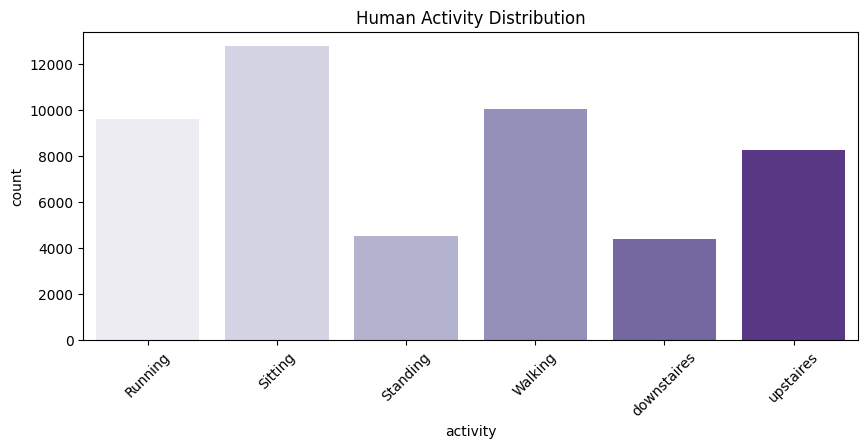

In [ ]:
# Count Plot Visualization
print(human_fall['activity'].value_counts())
plt.figure(figsize=(10, 4))
sns.countplot(x='activity', hue='activity', data=human_fall, palette='Purples')
plt.title('Human Activity Distribution')
plt.xticks(rotation=45)
plt.show()

### Distribution Plots via Histogram

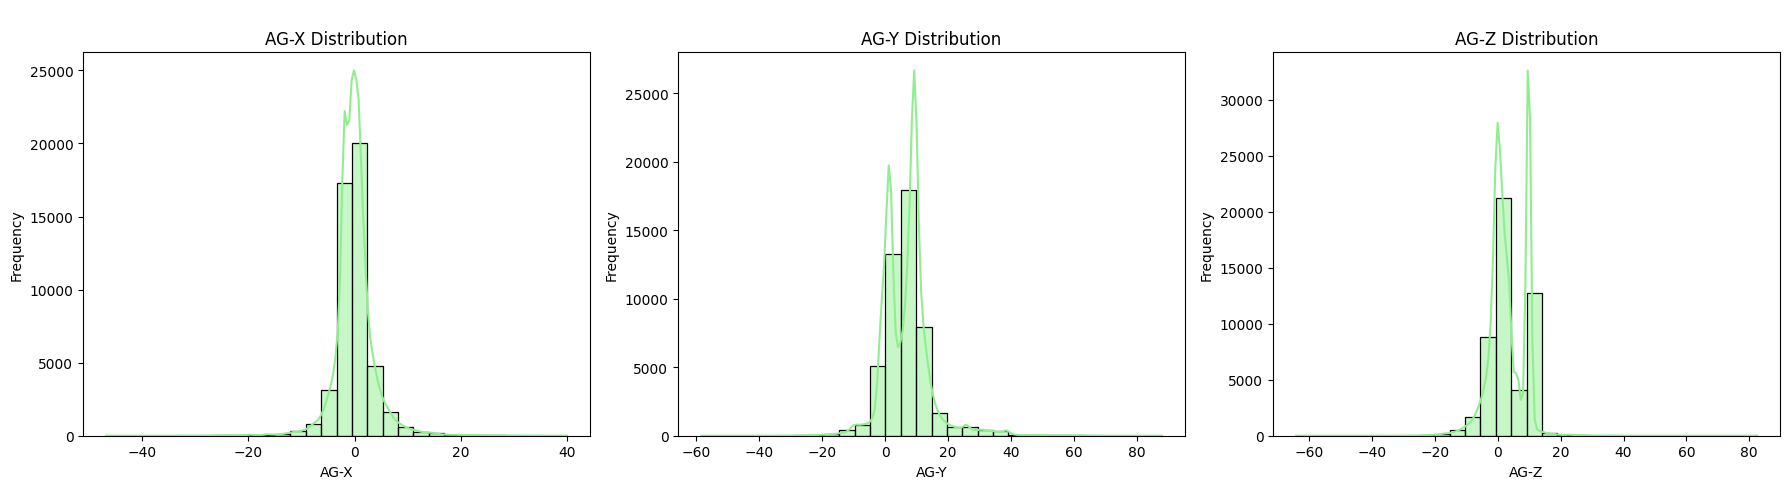

In [ ]:
# Acceleration due to Gravity
human_acc_cols = ['AG-X', 'AG-Y', 'AG-Z']

human_fig, human_axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(human_acc_cols):
    sns.histplot(human_fall[col], kde=True, color='lightgreen', bins=30, ax=human_axes[i])
    human_axes[i].set_title(f'\n{col} Distribution')
    human_axes[i].set_xlabel(col)
    human_axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

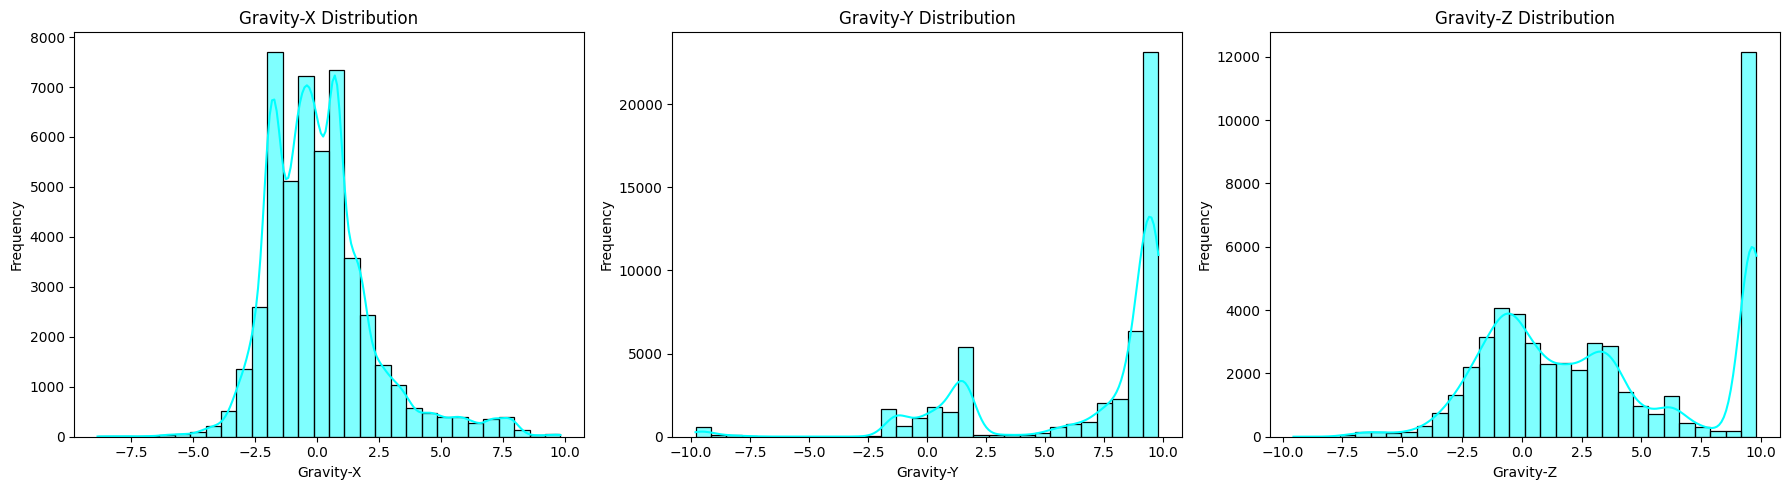

In [ ]:
# Gravity vector plots
human_gravity_cols = ['Gravity-X', 'Gravity-Y', 'Gravity-Z']
human_fig, human_axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(human_gravity_cols):
    sns.histplot(human_fall[col], kde=True, color='cyan', bins=30, ax=human_axes[i])
    human_axes[i].set_title(f'{col} Distribution')
    human_axes[i].set_xlabel(col)
    human_axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

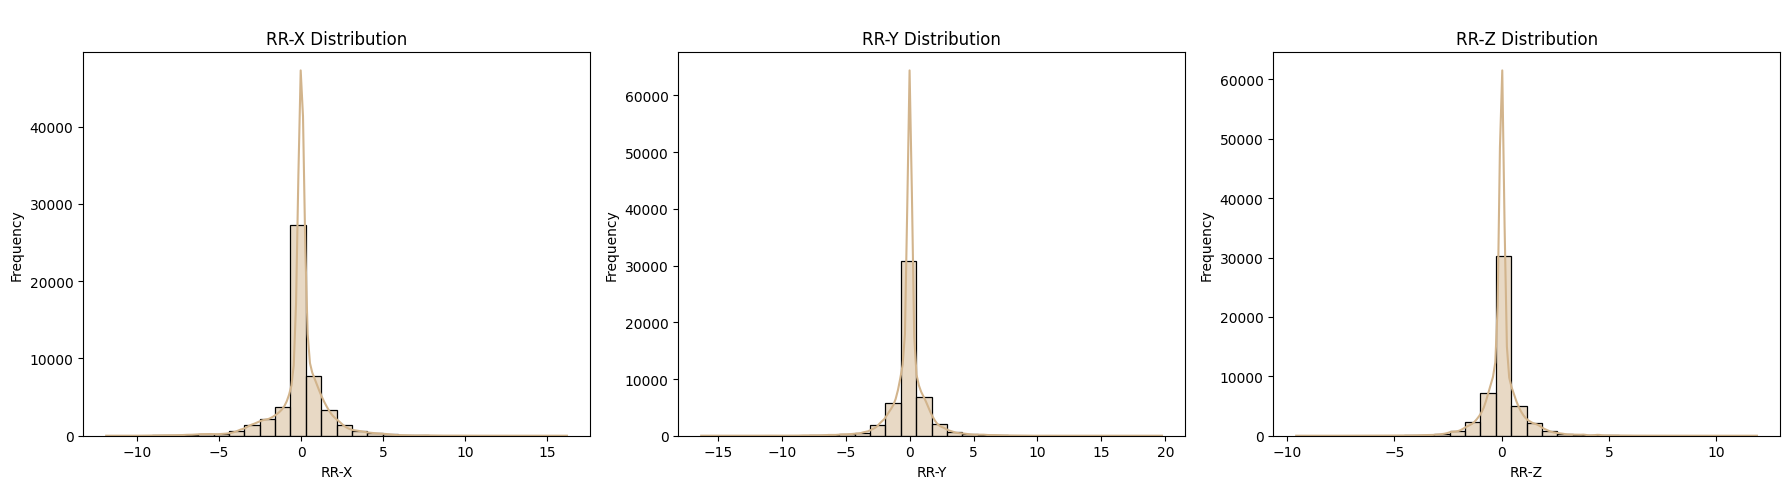

In [ ]:
# Rotational Rate vector plots
human_rotational_cols = ['RR-X', 'RR-Y', 'RR-Z']
human_fig, human_axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(human_rotational_cols):
    sns.histplot(human_fall[col], kde=True, color='tan', bins=30, ax=human_axes[i])
    human_axes[i].set_title(f'\n{col} Distribution')
    human_axes[i].set_xlabel(col)
    human_axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

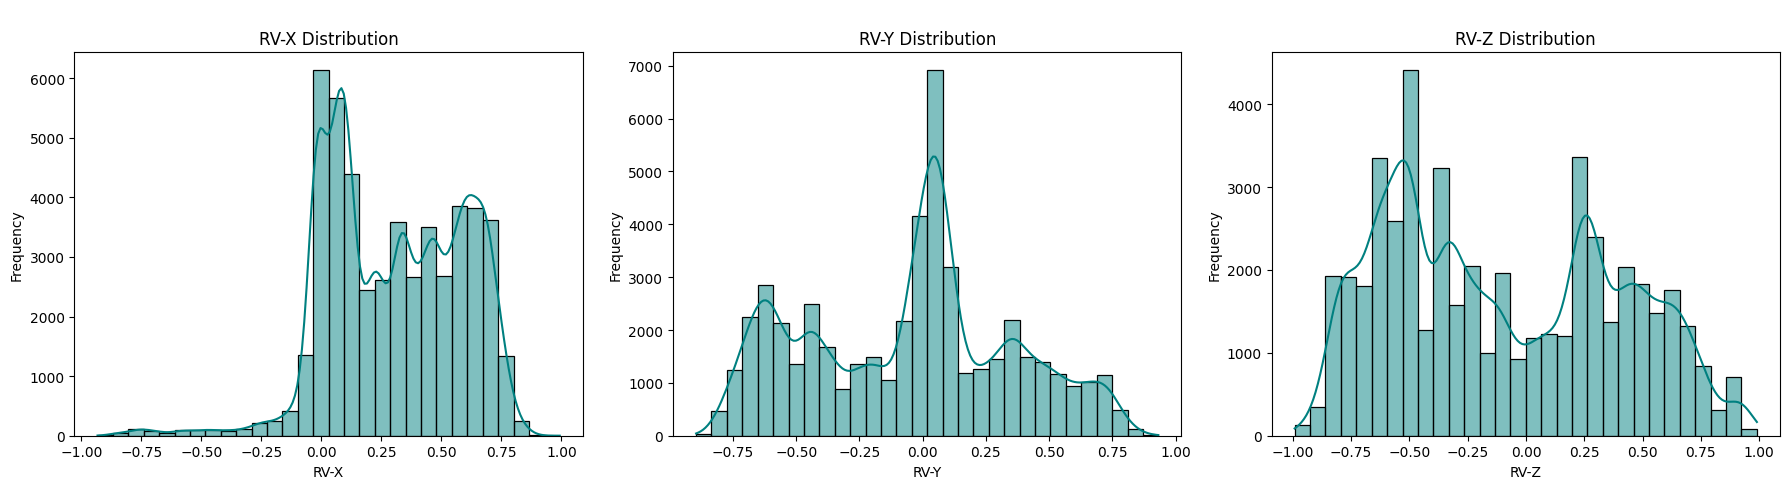

In [ ]:
# Rotational Vector plots
rotvec_cols = ['RV-X', 'RV-Y', 'RV-Z']
human_fig, human_axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(rotvec_cols):
    sns.histplot(human_fall[col], kde=True, color='teal', bins=30, ax=human_axes[i])
    human_axes[i].set_title(f'\n{col} Distribution')
    human_axes[i].set_xlabel(col)
    human_axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Keep 'downstaires' as it is
downstaires_df = human_fall[human_fall['activity'] == 'downstaires']

# Classes to downsample
classes_to_downsample = ['Sitting', 'Walking', 'Running', 'upstaires', 'Standing']

# Downsample with 4500
downsampled_dfs = [
    human_fall[human_fall['activity'] == cls].sample(n=4500, random_state=41)
    for cls in classes_to_downsample
]

# Combine both downsampled classes with 'downstaires'
HF_balanced = pd.concat(downsampled_dfs + [downstaires_df], ignore_index=True)
HF_balanced = HF_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(HF_balanced['activity'].value_counts())


activity
Walking        4500
Running        4500
Standing       4500
upstaires      4500
Sitting        4500
downstaires    4387
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Encode target labels
human_le = LabelEncoder()
HF_balanced['activity']= human_le.fit_transform(HF_balanced['activity'])
HF_balanced['activity'].value_counts()

,count
activity,
3,4500
0,4500
2,4500
5,4500
1,4500
4,4387


In [ ]:
human_fall_X = HF_balanced.drop('activity',axis=1)
human_fall_y = HF_balanced['activity']

## normalizing the data
HF_scaler = StandardScaler()
X_scaled = HF_scaler.fit_transform(human_fall_X)
X_scaled = pd.DataFrame(X_scaled, columns=human_fall_X.columns)
X_scaled.head()

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos
0,-0.013131,0.705680,-0.454380,-0.102154,0.371371,0.428515,0.160855,0.701907,-0.968800,-0.266979,0.638793,-0.051836,0.590757,-1.293526,-0.788548,-0.490045
1,-0.131515,0.062917,-0.571958,-0.432713,-0.457142,-0.011585,0.448424,0.708236,-0.705161,-0.737655,-0.741677,1.179793,-0.018367,-1.243847,-0.833259,-0.352648
2,0.756986,0.734245,0.315631,0.834250,0.278341,1.208227,0.274757,0.693942,-1.001927,-1.232450,-0.321795,-0.675725,0.766663,-1.204540,-0.668854,-0.328136
3,-2.071528,-0.556340,0.237326,-1.678659,-1.189988,1.679380,-1.021158,0.626782,-1.159371,0.203232,-2.267243,-0.341934,1.599808,0.264164,0.024552,0.158832
4,0.267792,1.360997,-1.803177,0.140714,1.168313,-2.227968,0.531348,0.649318,-0.183886,0.748489,2.510371,-0.960954,-0.642157,-1.369076,-1.330531,-1.305405


In [ ]:
# splitting the training data 80% and testing data 20%
HF_X_train, HF_X_test, HF_y_train, HF_y_test = train_test_split(X_scaled, human_fall_y, test_size=0.2, random_state=41)
print("Training HF shape 80%:", HF_X_train.shape, HF_y_train.shape)
print("Testing HF shape 20% :", HF_X_test.shape, HF_y_test.shape)

Training HF shape 80%: (21509, 16) (21509,)
Testing HF shape 20% : (5378, 16) (5378,)


In [ ]:
HF_X_train

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos
22668,0.318599,-0.949875,1.285633,0.121716,-0.045383,0.117089,0.384483,-1.520011,1.531895,0.020633,0.030044,-0.048160,-1.093334,0.028572,-0.220094,1.438027
16094,-0.357053,-2.189790,-0.481894,0.254555,-0.141616,-0.393227,-1.076912,-3.447151,-0.249015,0.483824,-0.771104,0.078398,-2.593135,-0.851199,1.504435,-0.378693
12397,0.123987,-0.329239,-0.917975,-0.926459,-0.430081,-0.821307,2.249803,0.414663,-0.495378,-3.562205,2.575874,-0.563081,1.254443,0.329500,1.187725,-0.003326
11324,-1.192319,-0.255362,-0.495927,-0.783440,-0.774402,-0.525411,0.206098,0.688927,-0.310161,-0.151617,1.245529,0.457094,-0.385791,-1.005316,-1.502617,-1.235260
20295,-1.812246,1.661912,-0.086968,-1.163412,1.547335,-0.243628,-0.978598,0.584989,-0.023235,-0.921280,0.251160,-0.250372,-0.132433,-1.180821,-1.393466,-1.409963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,-0.260184,-0.480730,-0.282591,0.741416,-0.987649,0.770456,-1.485057,0.619905,-0.632730,-2.547755,1.515342,1.662308,0.905262,1.161804,0.694093,0.352292
21584,0.130597,-0.939756,1.182672,-0.043134,-0.014034,-0.034247,0.309376,-1.543886,1.533926,-0.004332,-0.047343,-0.047475,-1.105817,0.051501,-0.225550,1.436746
20450,-0.026238,-0.837619,1.266213,0.032008,-0.029418,0.065437,-0.070022,-1.352807,1.546039,0.003396,0.012572,-0.029000,-0.928359,0.142678,0.828042,1.378707
931,-0.032658,-0.830765,1.267933,0.028780,-0.018900,0.071033,-0.076310,-1.355388,1.546116,0.004110,0.011783,-0.018247,-0.931078,0.143921,0.830969,1.377216


In [ ]:
HF_X_test

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos
19414,0.287052,1.022077,-0.331281,0.978656,0.757451,-0.018675,-0.389163,0.686971,-0.300518,0.713531,0.290920,0.427544,0.126663,1.475626,1.532481,-0.467962
15795,-0.117400,-0.669405,1.248147,0.029361,-0.024107,0.070733,-0.233021,-1.078718,1.518852,-0.000173,0.004680,-0.020636,-0.733846,0.220291,0.714780,1.420217
20351,1.190594,0.259529,-1.301065,1.204573,-0.201923,-0.819337,0.247222,0.704768,-0.921421,0.205687,0.029026,0.057511,-0.143750,-1.603371,-1.046244,-1.107611
18313,1.074128,1.663781,1.761720,-0.237174,-0.388366,1.780919,-0.727595,0.699421,-0.575508,-2.712199,-0.130272,0.868304,-0.405009,-1.421501,-1.319196,-1.752632
12701,-0.746547,-0.465679,-0.489568,0.176671,-0.911681,0.950265,-1.353513,0.544771,-1.322551,-1.971387,1.274493,0.673550,-1.677748,2.035520,1.466005,-2.017074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12871,4.739768,-0.589753,-0.750769,7.600168,-0.640813,0.611854,-1.251850,0.635622,-0.953704,0.810044,2.336690,1.036381,1.461208,-0.138052,-0.350765,0.113636
3719,-0.134402,0.751758,-0.904914,0.604034,0.449558,-0.784980,-1.100698,0.660021,-0.471594,-0.260199,0.243011,-0.027343,0.322515,-1.203268,-1.188977,-1.059881
8955,0.673108,0.035208,-0.489847,0.871275,-0.486037,0.280437,0.165489,0.714610,-0.835039,-0.005900,-0.269209,0.224688,0.442767,-1.314457,-0.873076,-0.537787
384,-0.015966,-0.845095,1.269654,0.029996,-0.042312,0.054333,-0.055835,-1.352171,1.545988,-0.001600,0.010993,0.000870,-0.926241,0.139132,0.824283,1.380630


## Implementing ML Models

### ML Model SVM

Best SVM parameters: {'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Training time: 18.305536031723022 seconds
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       941
           1       0.92      0.99      0.95       909
           2       0.86      0.96      0.91       865
           3       0.54      0.77      0.64       875
           4       0.67      0.50      0.57       861
           5       0.68      0.45      0.54       927

    accuracy                           0.75      5378
   macro avg       0.75      0.75      0.74      5378
weighted avg       0.75      0.75      0.74      5378


SVM Testing time: 6.851958513259888 seconds


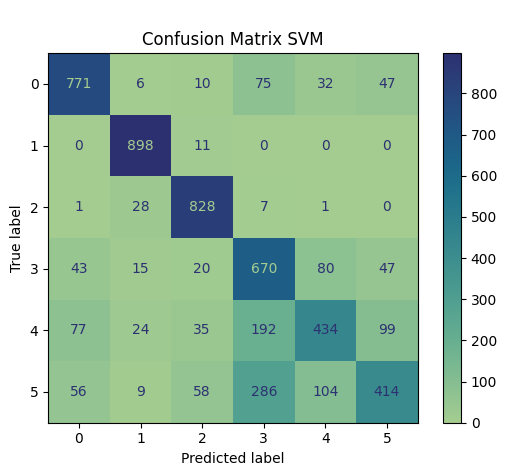

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

params_svm = {
    'C': [0.1, 0.01, 2],
    'kernel': ['rbf', 'linear', 'lbfgs'],
    'gamma': ['scale', 'auto'],
    'degree': [1, 2, 3]
}

svm_model = SVC()
grid_svm = GridSearchCV(svm_model, params_svm, cv=2)
grid_svm.fit(HF_X_train.sample(1500), HF_y_train.sample(1500))
print("Best SVM parameters:", grid_svm.best_params_)

start_time = time.time()
svm_mod = grid_svm.best_estimator_
svm_mod.fit(HF_X_train, HF_y_train)
end_time = time.time()
print(f"\nSVM Training time: {end_time - start_time} seconds")


start_time = time.time()
HF_y_pred = svm_mod.predict(HF_X_test)
print(classification_report(HF_y_test, HF_y_pred))
end_time = time.time()
print(f"\nSVM Testing time: {end_time - start_time} seconds")

HF_confmat = confusion_matrix(HF_y_test, HF_y_pred)
ConfusionMatrixDisplay(confusion_matrix=HF_confmat, display_labels=[0, 1, 2, 3, 4, 5]).plot(cmap='crest')
plt.title('\nConfusion Matrix SVM')
plt.show()

### ML Model KNN

Best KNN parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

KNN Training time: 0.003668546676635742 seconds
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       941
           1       0.99      1.00      1.00       909
           2       0.98      0.99      0.99       865
           3       0.80      0.88      0.84       875
           4       0.85      0.77      0.80       861
           5       0.83      0.86      0.84       927

    accuracy                           0.89      5378
   macro avg       0.89      0.89      0.89      5378
weighted avg       0.89      0.89      0.89      5378


KNN Testing time: 0.9080958366394043 seconds


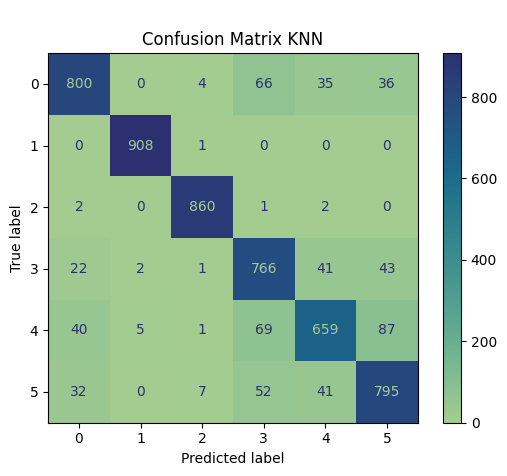

In [ ]:
params_knn = {
    'n_neighbors': [2, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_model, params_knn, cv=2)
grid_knn.fit(HF_X_train.sample(1500), HF_y_train.sample(1500))
print("Best KNN parameters:", grid_knn.best_params_)

start_time = time.time()
knn_mod = grid_knn.best_estimator_
knn_mod.fit(HF_X_train, HF_y_train)
end_time = time.time()
print(f"\nKNN Training time: {end_time - start_time} seconds")

start_time = time.time()
HF_y_pred = knn_mod.predict(HF_X_test)
print(classification_report(HF_y_test, HF_y_pred))
end_time = time.time()
print(f"\nKNN Testing time: {end_time - start_time} seconds")

HF_confmat = confusion_matrix(HF_y_test, HF_y_pred)
ConfusionMatrixDisplay(confusion_matrix=HF_confmat, display_labels=[0, 1, 2, 3, 4, 5]).plot(cmap='crest')
plt.title('\nConfusion Matrix KNN')
plt.show()

### ML Model DT

Best DT parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}

DT Training time: 1.2357900142669678 seconds
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       941
           1       0.99      0.98      0.99       909
           2       0.92      0.97      0.95       865
           3       0.50      0.68      0.57       875
           4       0.64      0.49      0.56       861
           5       0.58      0.47      0.52       927

    accuracy                           0.73      5378
   macro avg       0.73      0.73      0.73      5378
weighted avg       0.73      0.73      0.73      5378


DT Testing time: 0.0164487361907959 seconds


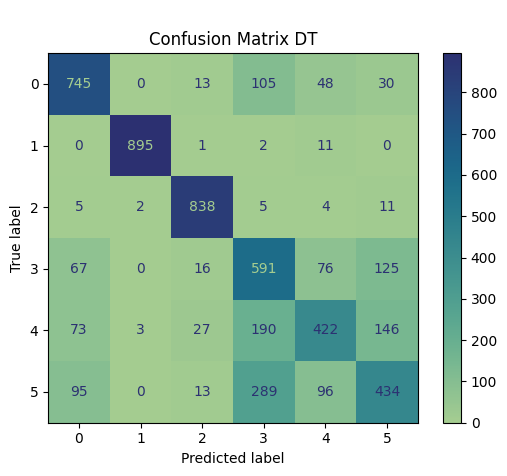

In [ ]:
params_dt = {
    'max_depth': [5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt_model, params_dt, cv=2)
grid_dt.fit(HF_X_train.sample(1500), HF_y_train.sample(1500))
print("Best DT parameters:", grid_dt.best_params_)

start_time = time.time()
dt_mod = grid_dt.best_estimator_
dt_mod.fit(HF_X_train, HF_y_train)
end_time = time.time()
print(f"\nDT Training time: {end_time - start_time} seconds")

start_time = time.time()
HF_y_pred = dt_mod.predict(HF_X_test)
print(classification_report(HF_y_test, HF_y_pred))
end_time = time.time()
print(f"\nDT Testing time: {end_time - start_time} seconds")

HF_confmat = confusion_matrix(HF_y_test, HF_y_pred)
ConfusionMatrixDisplay(confusion_matrix=HF_confmat, display_labels=[0, 1, 2, 3, 4, 5]).plot(cmap='crest')
plt.title('\nConfusion Matrix DT')
plt.show()
